In [1]:
!pip install PyTDC


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
from tdc import utils
names = utils.retrieve_benchmark_names('ADMET_Group')


In [3]:
!pip install tensorflow deepchem


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [4]:
import deepchem as dc
from tdc.single_pred import ADME

# Load the dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Featurize data
featurizer = dc.feat.OneHotFeaturizer()
train_features = featurizer.featurize(split['train']['Drug'])
test_features = featurizer.featurize(split['test']['Drug'])

# Inspect the shape of the features
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


Downloading...
100%|██████████████████████████████████████████████████████████████████████████████| 740k/740k [00:00<00:00, 2.77MiB/s]
Loading...
Done!


Train features shape: (8465,)
Test features shape: (2418,)


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot, tokenizer.word_index

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features, _ = one_hot_smiles(train_smiles, max_smiles_length)
test_features, _ = one_hot_smiles(test_smiles, max_smiles_length)

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


Train features shape: (8465, 311)
Test features shape: (2418, 311)


In [6]:
import numpy as np

train_features = np.array(train_features)
test_features = np.array(test_features)


In [28]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot, tokenizer.word_index

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features, _ = one_hot_smiles(train_smiles, max_smiles_length)
test_features, _ = one_hot_smiles(test_smiles, max_smiles_length)

# Ensure features are NumPy arrays
train_features = np.array(train_features)
test_features = np.array(test_features)

# Reshape features for LSTM input
train_features_lstm = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))
test_features_lstm = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(max_smiles_length, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_features_lstm, split['train']['Y'], epochs=50, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(test_features_lstm, split['test']['Y'])
print(f'Test Accuracy: {accuracy}')


Found local copy...
Loading...
Done!


Epoch 1/50
67/67 [==============================] - 16s 196ms/step - loss: 0.6456 - accuracy: 0.6677
Epoch 2/50
67/67 [==============================] - 13s 195ms/step - loss: 0.6363 - accuracy: 0.6677
Epoch 3/50
67/67 [==============================] - 13s 195ms/step - loss: 0.6361 - accuracy: 0.6677
Epoch 4/50
67/67 [==============================] - 13s 194ms/step - loss: 0.6362 - accuracy: 0.6677
Epoch 5/50
67/67 [==============================] - 13s 197ms/step - loss: 0.6359 - accuracy: 0.6677
Epoch 6/50
67/67 [==============================] - 13s 197ms/step - loss: 0.6361 - accuracy: 0.6677
Epoch 7/50
67/67 [==============================] - 13s 197ms/step - loss: 0.6362 - accuracy: 0.6677
Epoch 8/50
67/67 [==============================] - 13s 195ms/step - loss: 0.6368 - accuracy: 0.6677
Epoch 9/50
67/67 [==============================] - 13s 193ms/step - loss: 0.6363 - accuracy: 0.6677
Epoch 10/50
67/67 [==============================] - 13s 193ms/step - loss: 0.6362 - accura

In [29]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = ADME(name='CYP2C9_Veith')
split = data.get_split()

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features = one_hot_smiles(train_smiles, max_smiles_length)
test_features = one_hot_smiles(test_smiles, max_smiles_length)

# Ensure features are NumPy arrays
train_features = np.array(train_features)
test_features = np.array(test_features)

# Define the Feed-Forward Neural Network model
ffnn_model = Sequential()
ffnn_model.add(Flatten(input_shape=(max_smiles_length,)))
ffnn_model.add(Dense(128, activation='relu'))
ffnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ffnn_model.fit(train_features, split['train']['Y'], epochs=50, batch_size=128)

# Evaluate the model
loss, accuracy = ffnn_model.evaluate(test_features, split['test']['Y'])
print(f'Test Accuracy: {accuracy}')


Found local copy...
Loading...
Done!


Epoch 1/50
67/67 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.6478
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.6920
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.7030
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7190
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.7369
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7483
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7543
Epoch 8/50
67/67 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7719
Epoch 9/50
67/67 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7767
Epoch 10/50
67/67 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7910
Epoch 11/50
67/67 [

76/76 [==============================] - 3s 37ms/step
Confusion Matrix:
 [[1598    1]
 [ 819    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80      1599
           1       0.00      0.00      0.00       819

    accuracy                           0.66      2418
   macro avg       0.33      0.50      0.40      2418
weighted avg       0.44      0.66      0.53      2418



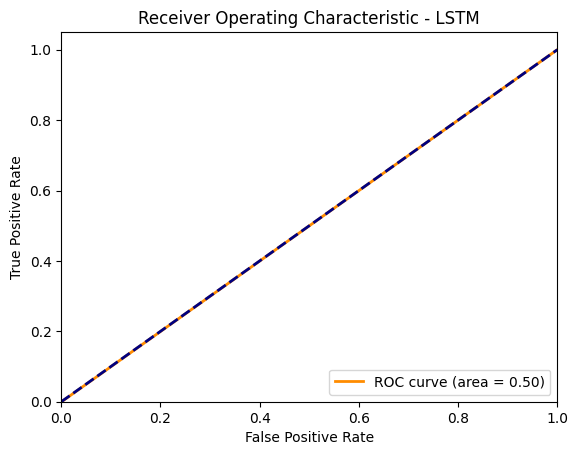

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predictions
lstm_predictions = model.predict(test_features_lstm)
lstm_predictions = (lstm_predictions > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], lstm_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(split['test']['Y'], lstm_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(split['test']['Y'], lstm_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LSTM')
plt.legend(loc="lower right")
plt.show()


76/76 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[1160  439]
 [ 385  434]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1599
           1       0.50      0.53      0.51       819

    accuracy                           0.66      2418
   macro avg       0.62      0.63      0.63      2418
weighted avg       0.66      0.66      0.66      2418



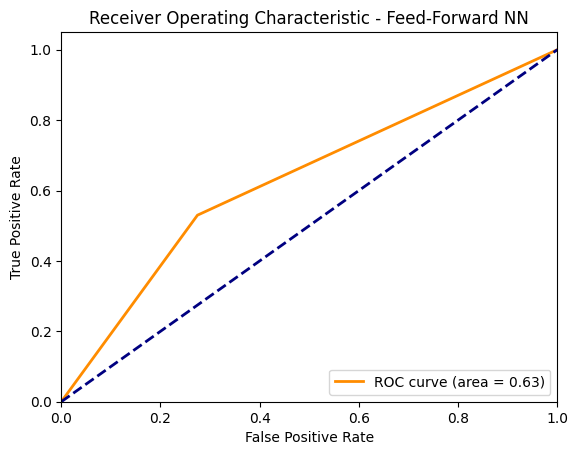

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predictions with Feed-Forward Neural Network model
ffnn_predictions = ffnn_model.predict(test_features)
ffnn_predictions = (ffnn_predictions > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], ffnn_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(split['test']['Y'], ffnn_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(split['test']['Y'], ffnn_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Feed-Forward NN')
plt.legend(loc="lower right")
plt.show()


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef
import numpy as np

# Predictions with Feed-Forward Neural Network model
ffnn_predictions = ffnn_model.predict(test_features)
ffnn_predictions_binary = (ffnn_predictions > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], ffnn_predictions_binary)

# Extracting True Positives, True Negatives, False Positives, False Negatives
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Calculating metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)  # Also known as Recall
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(split['test']['Y'], ffnn_predictions_binary)
auc = roc_auc_score(split['test']['Y'], ffnn_predictions)

# Print metrics
print(f"Loss: {loss}")
print(f"Accuracy (ACC): {accuracy}")
print(f"AUC: {auc}")
print(f"Sensitivity (Sen): {sensitivity}")
print(f"Specificity (Spe): {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")


76/76 [==============================] - 0s 840us/step
Loss: 0.9377419948577881
Accuracy (ACC): 0.6592224979321754
AUC: 0.6939479115839342
Sensitivity (Sen): 0.5299145299145299
Specificity (Spe): 0.7254534083802376
Matthews Correlation Coefficient (MCC): 0.2516292882943914


In [33]:
# Train the model and capture history
history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         verbose=1)


Epoch 1/50
67/67 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9308 - val_loss: 0.9385 - val_accuracy: 0.6663
Epoch 2/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9307 - val_loss: 0.9536 - val_accuracy: 0.6650
Epoch 3/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9374 - val_loss: 0.9739 - val_accuracy: 0.6774
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9356 - val_loss: 0.9766 - val_accuracy: 0.6729
Epoch 5/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9367 - val_loss: 0.9968 - val_accuracy: 0.6592
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9296 - val_loss: 1.0063 - val_accuracy: 0.6663
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9330 - val_loss: 1.0301 - val_accuracy: 0.6778
Epoch 8/50
67/67 [==

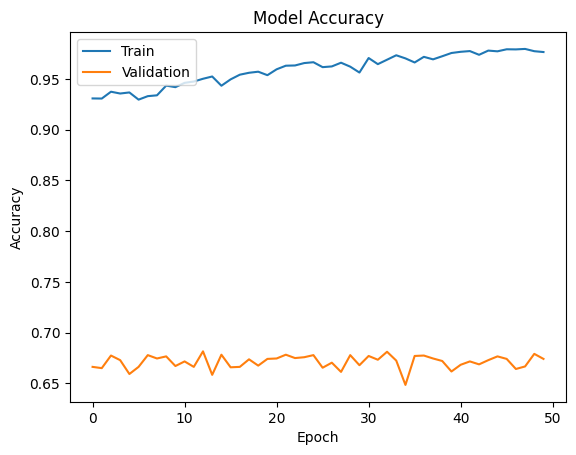

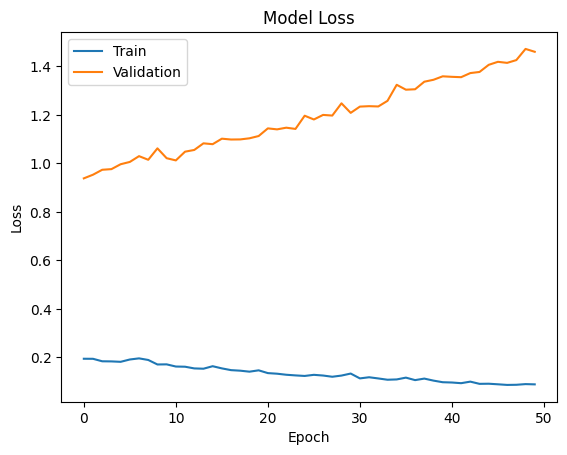

In [34]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import roc_auc_score

class RocAucCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_auc = []
        self.val_auc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = self.model.predict(self.x_train)
        val_pred = self.model.predict(self.x_val)
        train_auc = roc_auc_score(self.y_train, train_pred)
        val_auc = roc_auc_score(self.y_val, val_pred)
        self.train_auc.append(train_auc)
        self.val_auc.append(val_auc)
        print(f'\nEpoch {epoch + 1}: train_auc: {train_auc}, val_auc: {val_auc}')


In [37]:
roc_auc_callback = RocAucCallback(training_data=(train_features, split['train']['Y']),
                                  validation_data=(test_features, split['test']['Y']))

history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         callbacks=[roc_auc_callback],
                         verbose=1)

Epoch 1/50
76/76 [==============================] - 0s 827us/step

Epoch 1: train_auc: 0.9987120635186598, val_auc: 0.6862317031172566
67/67 [==============================] - 1s 11ms/step - loss: 0.0855 - accuracy: 0.9794 - val_loss: 1.4516 - val_accuracy: 0.6787
Epoch 2/50
76/76 [==============================] - 0s 753us/step

Epoch 2: train_auc: 0.9980386910534926, val_auc: 0.6889642565064704
67/67 [==============================] - 1s 11ms/step - loss: 0.0849 - accuracy: 0.9799 - val_loss: 1.4894 - val_accuracy: 0.6766
Epoch 3/50
76/76 [==============================] - 0s 826us/step

Epoch 3: train_auc: 0.9985384685248374, val_auc: 0.6900302463154245
67/67 [==============================] - 1s 12ms/step - loss: 0.0813 - accuracy: 0.9792 - val_loss: 1.4798 - val_accuracy: 0.6671
Epoch 4/50
76/76 [==============================] - 0s 842us/step

Epoch 4: train_auc: 0.9988199943191667, val_auc: 0.6812381212005978
67/67 [==============================] - 1s 12ms/step - loss: 0.0810 -

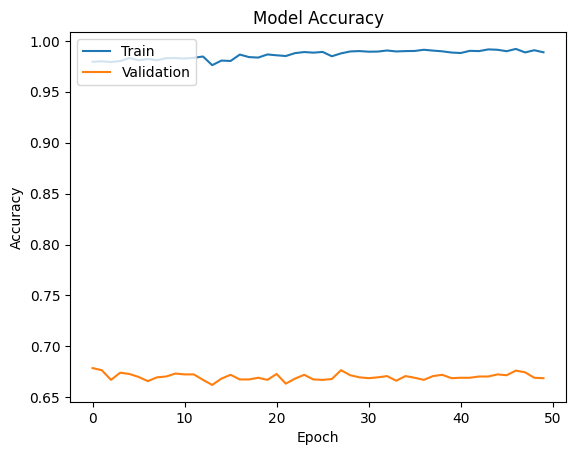

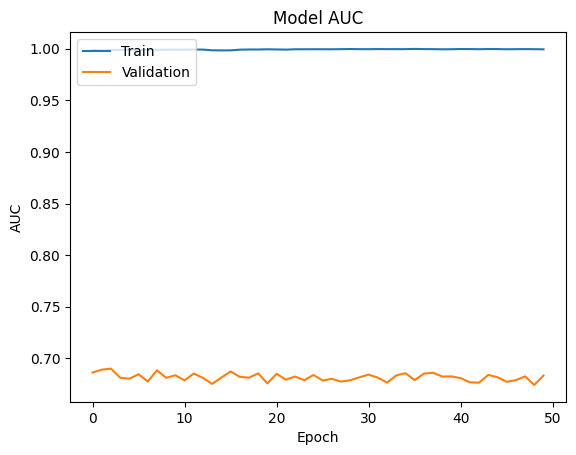

In [40]:
# Plotting Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting AUC
plt.plot(roc_auc_callback.train_auc)
plt.plot(roc_auc_callback.val_auc)
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef

class MetricsCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_sen = []
        self.val_sen = []
        self.train_spe = []
        self.val_spe = []
        self.train_mcc = []
        self.val_mcc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = (self.model.predict(self.x_train) > 0.5).astype(int)
        val_pred = (self.model.predict(self.x_val) > 0.5).astype(int)

        # Compute confusion matrix for both train and validation sets
        train_cm = confusion_matrix(self.y_train, train_pred)
        val_cm = confusion_matrix(self.y_val, val_pred)

        # Calculate metrics
        train_sen, train_spe = self.calculate_sen_spe(train_cm)
        val_sen, val_spe = self.calculate_sen_spe(val_cm)

        train_mcc = matthews_corrcoef(self.y_train, train_pred)
        val_mcc = matthews_corrcoef(self.y_val, val_pred)

        # Append metrics to lists
        self.train_sen.append(train_sen)
        self.val_sen.append(val_sen)
        self.train_spe.append(train_spe)
        self.val_spe.append(val_spe)
        self.train_mcc.append(train_mcc)
        self.val_mcc.append(val_mcc)

    def calculate_sen_spe(self, cm):
        tp = cm[1, 1]
        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        return sensitivity, specificity


In [42]:
metrics_callback = MetricsCallback(training_data=(train_features, split['train']['Y']),
                                   validation_data=(test_features, split['test']['Y']))

history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         callbacks=[metrics_callback],
                         verbose=1)


Epoch 1/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0678 - accuracy: 0.9798 - val_loss: 2.0926 - val_accuracy: 0.6621
Epoch 2/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0708 - accuracy: 0.9828 - val_loss: 2.0313 - val_accuracy: 0.6638
Epoch 3/50
67/67 [==============================] - 1s 10ms/step - loss: 0.0579 - accuracy: 0.9850 - val_loss: 1.9813 - val_accuracy: 0.6621
Epoch 4/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0494 - accuracy: 0.9902 - val_loss: 2.0211 - val_accuracy: 0.6737
Epoch 5/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0451 - accuracy: 0.9913 - val_loss: 2.0664 - val_accuracy: 0.6629
Epoch 6/50
67/67 [==============================] - 1s 11ms/step - loss: 0.0442 - accuracy: 0.9917 - val_loss: 2.0781 - val_accuracy: 0.6663
Epoch 7/50
67/67 [==============================] - 1s 10ms/step - loss: 0.0365 - accuracy: 0.9946 - val_loss: 2.0657 - val_accuracy: 0.6679
Epoch 8/50
67

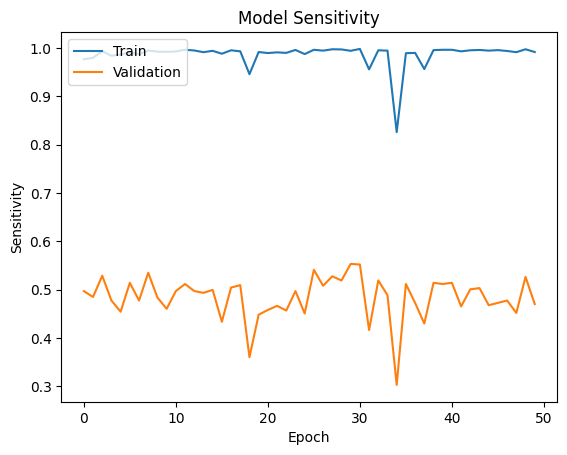

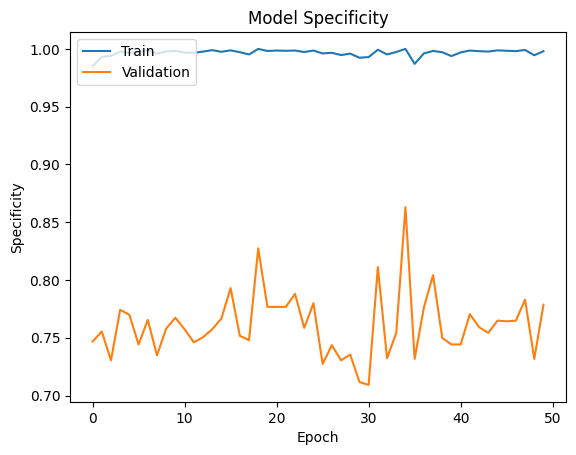

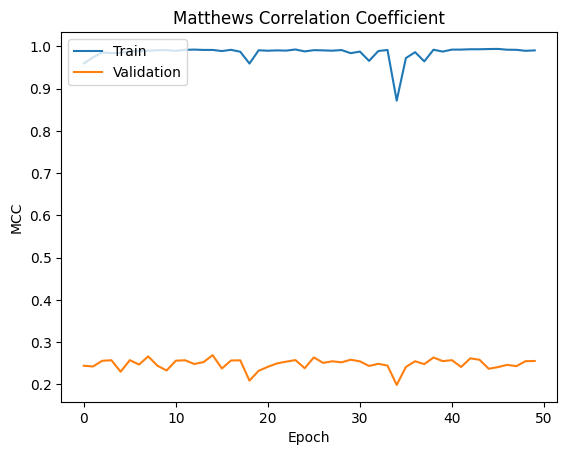

In [43]:
# Plotting Sensitivity
plt.plot(metrics_callback.train_sen)
plt.plot(metrics_callback.val_sen)
plt.title('Model Sensitivity')
plt.ylabel('Sensitivity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Specificity
plt.plot(metrics_callback.train_spe)
plt.plot(metrics_callback.val_spe)
plt.title('Model Specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Matthews Correlation Coefficient
plt.plot(metrics_callback.train_mcc)
plt.plot(metrics_callback.val_mcc)
plt.title('Matthews Correlation Coefficient')
plt.ylabel('MCC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [52]:
#Plots for LSTM

In [44]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, matthews_corrcoef

class LSTM_MetricsCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_sen = []
        self.val_sen = []
        self.train_spe = []
        self.val_spe = []
        self.train_mcc = []
        self.val_mcc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = (self.model.predict(self.x_train) > 0.5).astype(int)
        val_pred = (self.model.predict(self.x_val) > 0.5).astype(int)

        # Compute confusion matrix for both train and validation sets
        train_cm = confusion_matrix(self.y_train, train_pred)
        val_cm = confusion_matrix(self.y_val, val_pred)

        # Calculate metrics
        train_sen, train_spe = self.calculate_sen_spe(train_cm)
        val_sen, val_spe = self.calculate_sen_spe(val_cm)

        train_mcc = matthews_corrcoef(self.y_train, train_pred)
        val_mcc = matthews_corrcoef(self.y_val, val_pred)

        # Append metrics to lists
        self.train_sen.append(train_sen)
        self.val_sen.append(val_sen)
        self.train_spe.append(train_spe)
        self.val_spe.append(val_spe)
        self.train_mcc.append(train_mcc)
        self.val_mcc.append(val_mcc)

    def calculate_sen_spe(self, cm):
        tp = cm[1, 1]
        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        return sensitivity, specificity

In [45]:
lstm_metrics_callback = LSTM_MetricsCallback(training_data=(train_features_lstm, split['train']['Y']),
                                             validation_data=(test_features_lstm, split['test']['Y']))

lstm_history = model.fit(train_features_lstm, split['train']['Y'], 
                              epochs=20, batch_size=128,
                              validation_data=(test_features_lstm, split['test']['Y']),
                              callbacks=[lstm_metrics_callback],
                              verbose=1)


Epoch 1/20
67/67 [==============================] - 27s 401ms/step - loss: 0.6364 - accuracy: 0.6677 - val_loss: 0.6408 - val_accuracy: 0.6613
Epoch 2/20
67/67 [==============================] - 27s 401ms/step - loss: 0.6362 - accuracy: 0.6677 - val_loss: 0.6401 - val_accuracy: 0.6613
Epoch 3/20
67/67 [==============================] - 26s 385ms/step - loss: 0.6361 - accuracy: 0.6677 - val_loss: 0.6401 - val_accuracy: 0.6613
Epoch 4/20
67/67 [==============================] - 25s 383ms/step - loss: 0.6361 - accuracy: 0.6677 - val_loss: 0.6408 - val_accuracy: 0.6613
Epoch 5/20
67/67 [==============================] - 26s 385ms/step - loss: 0.6360 - accuracy: 0.6677 - val_loss: 0.6401 - val_accuracy: 0.6613
Epoch 6/20
67/67 [==============================] - 25s 384ms/step - loss: 0.6364 - accuracy: 0.6677 - val_loss: 0.6400 - val_accuracy: 0.6613
Epoch 7/20
67/67 [==============================] - 27s 399ms/step - loss: 0.6359 - accuracy: 0.6677 - val_loss: 0.6401 - val_accuracy: 0.6613

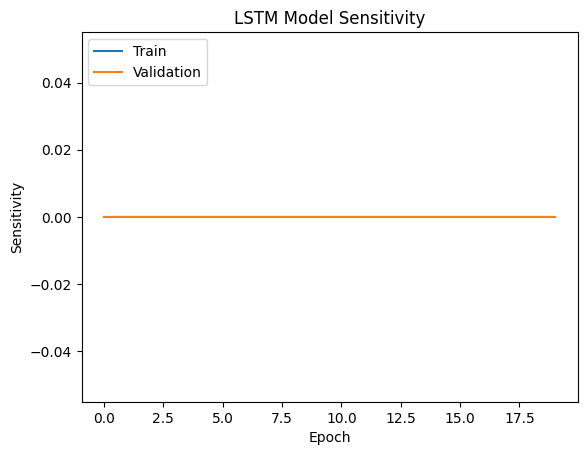

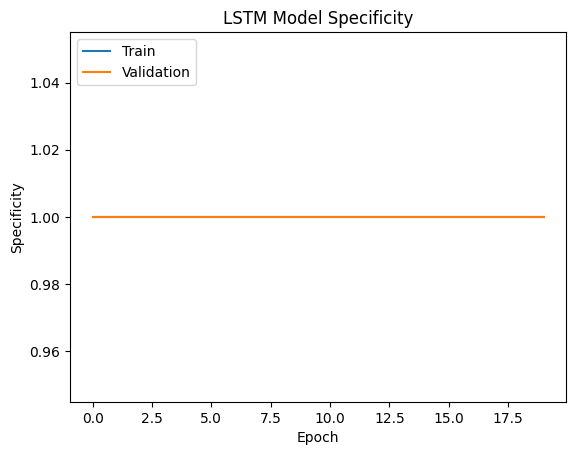

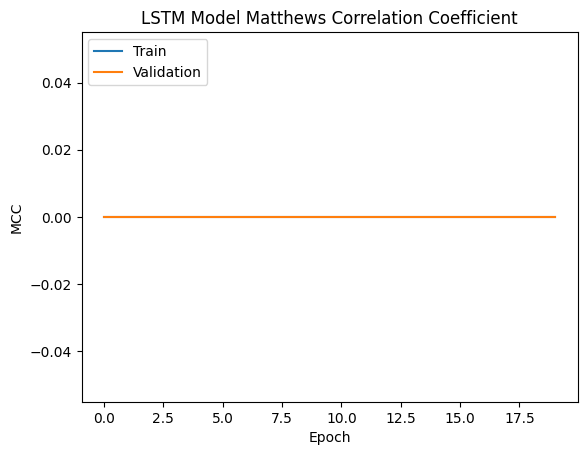

In [46]:
# Plotting Sensitivity
plt.plot(lstm_metrics_callback.train_sen)
plt.plot(lstm_metrics_callback.val_sen)
plt.title('LSTM Model Sensitivity')
plt.ylabel('Sensitivity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Specificity
plt.plot(lstm_metrics_callback.train_spe)
plt.plot(lstm_metrics_callback.val_spe)
plt.title('LSTM Model Specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Matthews Correlation Coefficient
plt.plot(lstm_metrics_callback.train_mcc)
plt.plot(lstm_metrics_callback.val_mcc)
plt.title('LSTM Model Matthews Correlation Coefficient')
plt.ylabel('MCC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()